# MEALOR II - TD tomography data analysis

Summer school website: https://mealor2.sciencesconf.org

The exercize has been prepared by Florent Hannard (florent.hannard@gmail.com) with the help of Aude Simar (aude.simar@uclouvain.be) and Sophie de Raedemacker (sophie.deraedemacker@uclouvain.be).

This python notebook and Fiji macro have been prepared by Christophe Le Bourlot (christophe.le-bourlot@insa-lyon.fr).


### Preamble

The data used are extracted from : [A Dataset for In-situ synchrotron tomography experiments to investigate anisotropic damage of line pipe steel](https://zenodo.org/record/3528199#.ZHb2OoTP02w).

<p align="center">
    <a href="https://doi.org/10.5281/zenodo.3528199"><img src="https://zenodo.org/badge/DOI/10.5281/zenodo.3528199.svg" alt="DOI"></a>
</p>



The analysis is done using the Fiji software, freely availlable here : [https://imagej.net/software/fiji/downloads](https://imagej.net/software/fiji/downloads)

<p align="center">
    <img src="https://imagej.net/media/icons/fiji.svg" style="width=100px;"/>
</p>

During the time of the MEALOR II school, the dataset and some of the scripts used are available to download here : [data tomo](https://eur03.safelinks.protection.outlook.com/?url=https%3A%2F%2Ftransvol.sgsi.ucl.ac.be%2Fdownload.php%3Fid%3De351a905f9a0b442&data=05%7C01%7Caude.simar%40uclouvain.be%7C3c9ea1adf23146ded71608db9cc3250d%7C7ab090d4fa2e4ecfbc7c4127b4d582ec%7C0%7C0%7C638276134176776463%7CUnknown%7CTWFpbGZsb3d8eyJWIjoiMC4wLjAwMDAiLCJQIjoiV2luMzIiLCJBTiI6Ik1haWwiLCJXVCI6Mn0%3D%7C3000%7C%7C%7C&sdata=8LUzWFdov6vuIhM4iuvEaacjUH6wfCnGcYWDD9T%2F%2B8o%3D&reserved=0) (/!\ 3.5Gb)

### The dataset
The data sets used for this exercise session are related to the paper "On the origin of the anisotropic damage of X100 line pipe steel, Part I: in-situ synchrotron tomography experiments" published by Madi et al. in Integrating Materials and Manufacturing Innovation. We will only use a few scans, but the complete dataset is available here:  [https://zenodo.org/record/3528199#.ZHb2OoTP02w](https://zenodo.org/record/3528199#.ZHb2OoTP02w).

<img src="../data_description.png" />

In this study, the damage evolution of a grade X100 line pipe steel were investigated using in-situ synchrotron-radiation computed tomography (SRCT) of notched round bars (see Fig., right). Three scans (scan 01, scan 06 and scan 13, see Fig. left) will be used, they have been obtained on a specimens loaded along the rolling (L) direction. 

The first scan (scan 01) has been obtained in the early stage of elastic regime, and it will be used as the initial state (i.e. the minor εel is neglected). Scan 06 and scan 13 were obtained after significant void nucleation/growth and at the onset of the final coalescence stage that triggers catastrophic failure of the specimen, respectively. 

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
import matplotlib.pylab as plt

## Load data 

In [2]:
# Enter your data folder path location
data_folder = "."

In [3]:
data_csv_ech = sorted(glob(os.path.join(data_folder,"tptomo_*_surface.csv")))
data_csv_cav = sorted(glob(os.path.join(data_folder,"tptomo_*_cavites.csv")))
data_ech = [pd.read_csv(d) for d in data_csv_ech]
data_cav = [pd.read_csv(d) for d in data_csv_cav]

In [4]:
#centers = np.array([len(d)/2 for d in data_ech])
#print(centers)
# define the center of each sample by the position of the minimal crosssection
centers = np.array([d.iloc[:,1].idxmin() for d in data_ech])
print(centers)

[332 453 490]


## Strain

In [5]:
data_ech[0].iloc[:,1].idxmin()

332

In [6]:
l_0 = np.array([len(d.iloc[:,1]) for d in data_ech])
s_0 = np.array([d.iloc[:,1].min() for d in data_ech])
strain_average = np.log(l_0/l_0[0])
strain_local = np.log(s_0[0]/s_0)
print("Strain:")
print("      scan:   01    06    13")
print(" - average:", np.round(strain_average, 3))
print(" -   local:", np.round(strain_local, 3))

Strain:
      scan:   01    06    13
 - average: [0.    0.294 0.38 ]
 -   local: [0.    0.481 0.744]


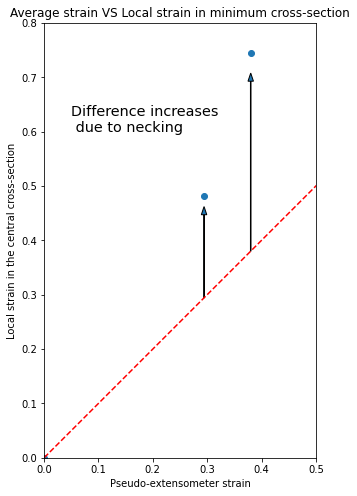

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(strain_average, strain_local)

plt.arrow(strain_average[1], strain_average[1], 0, 0.9*(strain_local[1]-strain_average[1]), head_width=0.01, length_includes_head=True)
plt.arrow(strain_average[2], strain_average[2], 0, 0.9*(strain_local[2]-strain_average[2]), head_width=0.01, length_includes_head=True)

plt.text(0.05, 0.6, "Difference increases\n due to necking", fontsize="x-large")

plt.plot([-0.1, 1], [-0.1, 1], '--r')
plt.gca().set_aspect('equal')
plt.xlim([-0., 0.5])
plt.ylim([-0., 0.8])

plt.title('Average strain VS Local strain in minimum cross-section')
plt.xlabel('Pseudo-extensometer strain')
plt.ylabel('Local strain in the central cross-section')
plt.show()

## cross section profile

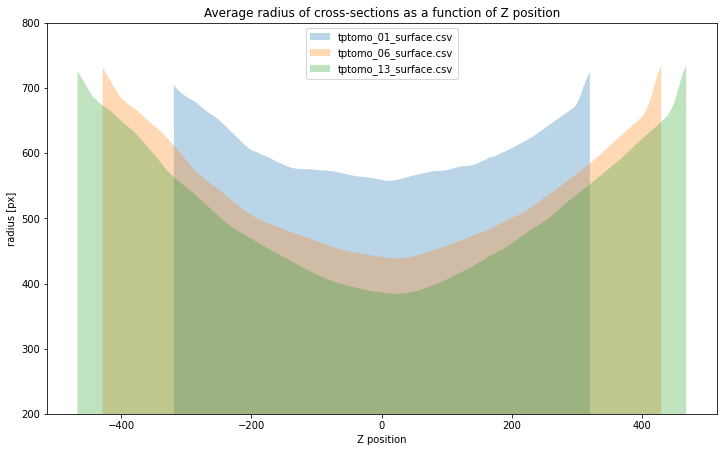

In [8]:
plt.figure(figsize=(12,8))
for d, t in zip(data_ech, data_csv_ech):
    x, y = d.iloc[:,0], d.iloc[:,1]
    plt.fill_between(x-len(x)/2, np.sqrt(y/np.pi), label=t.split("/")[-1], alpha=.3)
plt.ylim([200, 800])
plt.gca().set_aspect('equal')
plt.legend(loc='upper center')
plt.title('Average radius of cross-sections as a function of Z position')
plt.xlabel("Z position")
plt.ylabel("radius [px]")
plt.show()

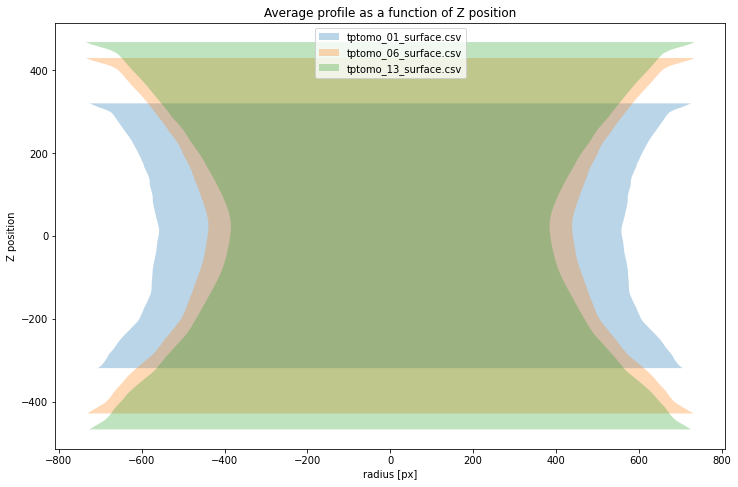

In [9]:
plt.figure(figsize=(12,8))
for d, t in zip(data_ech, data_csv_ech):
    x, y = d.iloc[:,0], d.iloc[:,1]
    plt.fill_betweenx(x-len(x)/2, -np.sqrt(y/np.pi), np.sqrt(y/np.pi), label=t.split("/")[-1], alpha=.3)
#plt.ylim([200, 800])
plt.gca().set_aspect('equal')
plt.legend(loc='upper center')
plt.title('Average profile as a function of Z position')
plt.ylabel("Z position")
plt.xlabel("radius [px]")
plt.show()

## Density

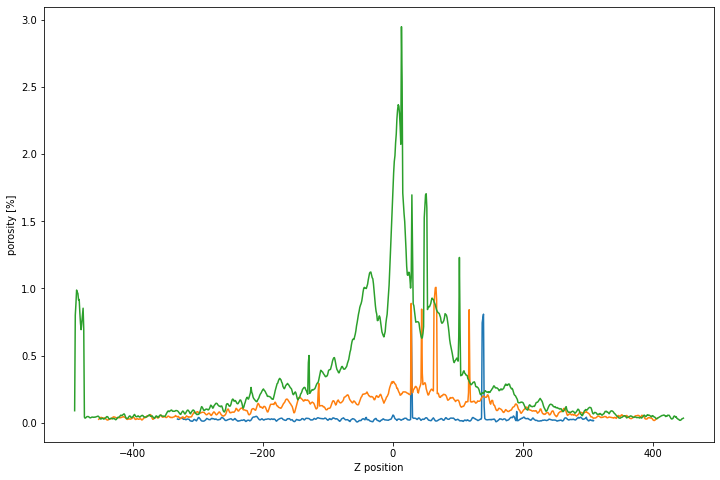

In [10]:
plt.figure(figsize=(12,8))
for i in range(3):
    x_e, y_e = data_ech[i].iloc[:,0], data_ech[i].iloc[:,1]
    x_c, y_c = data_cav[i].iloc[:,0], data_cav[i].iloc[:,1]
    plt.plot(x_e-centers[i], y_c/y_e*100)

plt.xlabel("Z position")
plt.ylabel("porosity [%]")
plt.show()


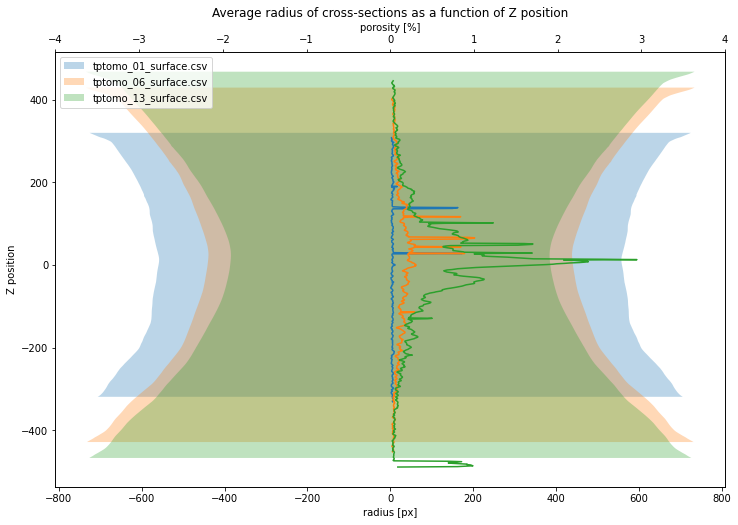

In [11]:
fig, ax1 = plt.subplots(figsize=(12,8))

for d, t in zip(data_ech, data_csv_ech):
    x, y = d.iloc[:,0], d.iloc[:,1]
    ax1.fill_betweenx(x-len(x)/2, -np.sqrt(y/np.pi), np.sqrt(y/np.pi), label=t.split("/")[-1], alpha=.3)
#plt.ylim([200, 800])

plt.gca().set_aspect('equal')

ax2 = ax1.twiny()

for i in range(3):
    x_e, y_e = data_ech[i].iloc[:,0], data_ech[i].iloc[:,1]
    x_c, y_c = data_cav[i].iloc[:,0], data_cav[i].iloc[:,1]
    ax2.plot(y_c/y_e*100, x_e-centers[i])
    
ax2.set_xlim([-4, 4])
ax1.legend(loc='upper left')
plt.title('Average radius of cross-sections as a function of Z position')
ax1.set_ylabel("Z position")
ax1.set_xlabel("radius [px]")
ax2.set_xlabel("porosity [%]")
plt.show()

## pseudo local strain

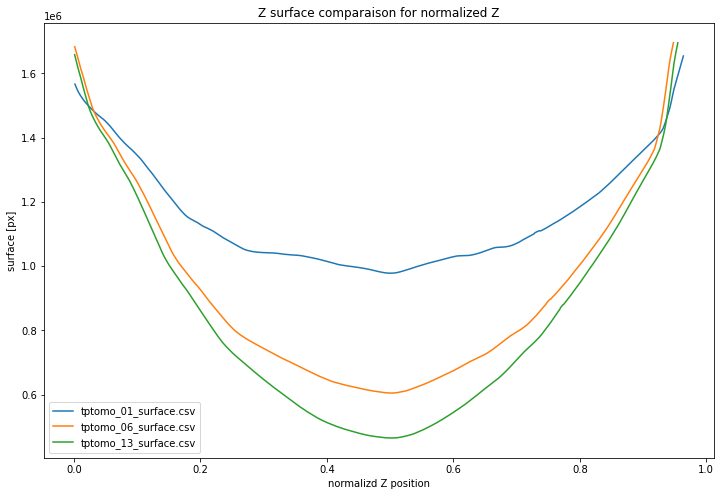

In [12]:
plt.figure(figsize=(12,8))

for i in range(3):
    _x = data_ech[i].iloc[:,0]/(2*centers[i])
    _y = data_ech[i].iloc[:,1]
    plt.plot(_x, _y, label=data_csv_ech[i].split("/")[-1])

plt.legend()
plt.title('Z surface comparaison for normalized Z')
plt.xlabel("normalizd Z position")
plt.ylabel("surface [px]")
plt.show()

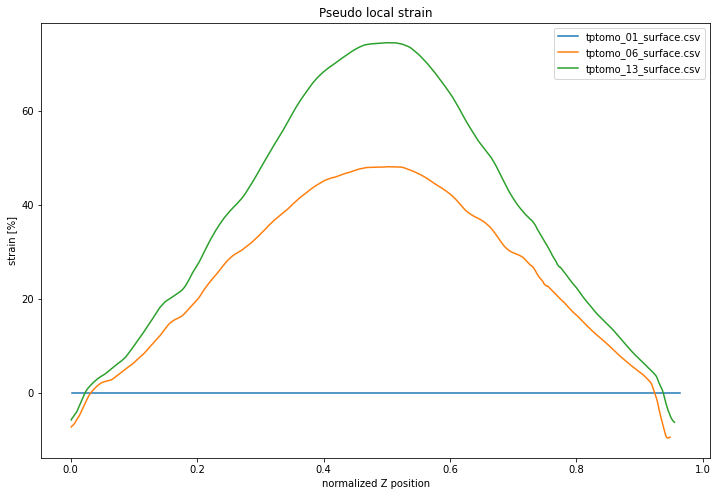

In [13]:
plt.figure(figsize=(12,8))
_x0 = data_ech[0].iloc[:,0]/(2*centers[0])
_y0 = data_ech[0].iloc[:,1]
for i in range(3):
    _x = data_ech[i].iloc[:,0]/(2*centers[i])
    _y = data_ech[i].iloc[:,1]
    plt.plot(_x, np.log(np.interp(_x, _x0, _y0)/_y)*100, label=data_csv_ech[i].split("/")[-1])

    
#plt.plot(_x, np.interp(_x, _x0, _y0), "*", label="fit")

#plt.ylim([200, 800])
#plt.gca().set_aspect('equal')
plt.legend()
plt.title('Pseudo local strain')
plt.xlabel("normalized Z position")
plt.ylabel("strain [%]")
plt.show()

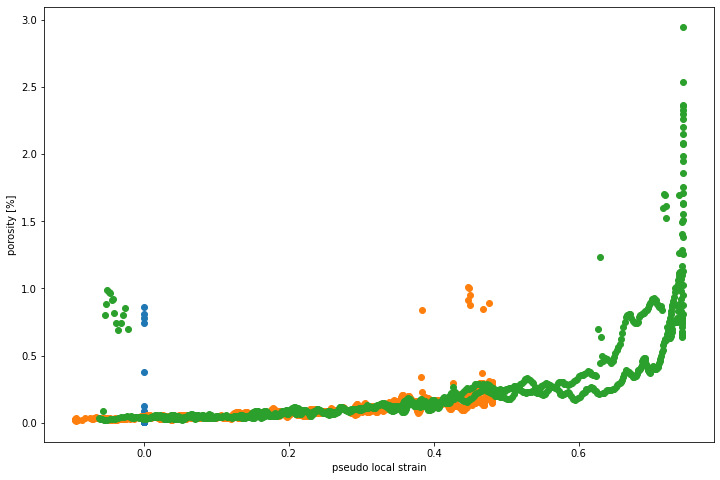

In [14]:
plt.figure(figsize=(12,8))
_x0 = data_ech[0].iloc[:,0]/(2*centers[0])
_y0 = data_ech[0].iloc[:,1]
for i in range(3):
    _x = data_ech[i].iloc[:,0]/(2*centers[i])
    _y = data_ech[i].iloc[:,1]
    x_e, y_e = data_ech[i].iloc[:,0], data_ech[i].iloc[:,1]
    x_c, y_c = data_cav[i].iloc[:,0], data_cav[i].iloc[:,1]
    plt.scatter(np.log(np.interp(_x, _x0, _y0)/_y), y_c/y_e*100)

plt.xlabel("pseudo local strain")
plt.ylabel("porosity [%]")
plt.show()

# Analyse porosity

## Load the file

In [15]:
data_csv_cav_analyse = sorted(glob(os.path.join(data_folder,"tptomo_*_cavites_3danalysis.csv")))
data_cav_analyse = [pd.read_csv(d) for d in data_csv_cav_analyse]

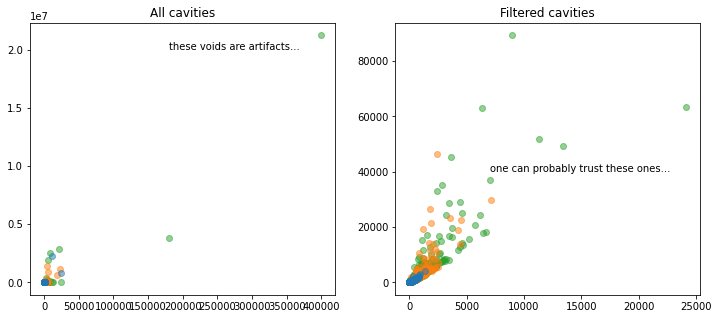

In [16]:
# tentative to isolate artefacts/rings by comparing void volume 
# to the void bounding box volume
# if the ratio is too large, this is a very weird shape, probably a ring...
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.set_title("All cavities")
for i, d in enumerate(data_cav_analyse):
    ax1.scatter(d["Vol (pix)"], d["VolBounding (pix)"], alpha=0.5, zorder=3-i)

ax1.text(180000, 2e7, "these voids are artifacts...")

# the filterd data
data_cav_analyse_filterd = []
for d in data_cav_analyse:
    d["vol_ratio"] = d["Vol (pix)"]/d["VolBounding (pix)"]
    dd = d[d["vol_ratio"]>0.05]
    data_cav_analyse_filterd.append(dd)
    
ax2.set_title("Filtered cavities")
for i, d in enumerate(data_cav_analyse_filterd):
    ax2.scatter(d["Vol (pix)"], d["VolBounding (pix)"], alpha=0.5, zorder=3-i)
ax2.text(7000, 40000, "one can probably trust these ones...")

plt.show()

This approach is a nice way to filter artifacts when the are independant (not connected to voids for exemple).
Once the label of the filtered feature known, they can be removed from the volume and/or from the dataset.
This methods can be looped until stabilization of the dataset.

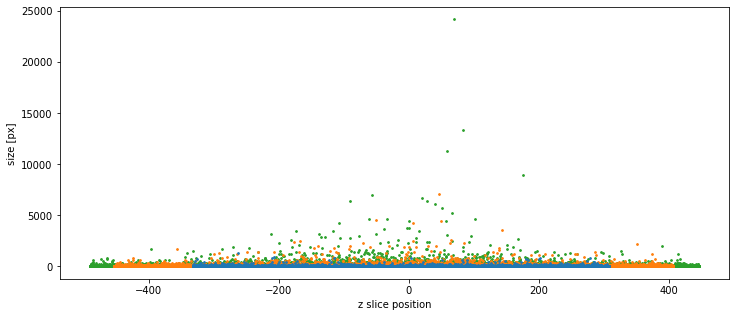

In [17]:
# plot the void size as function of their position
plt.figure(figsize=(12,5))


for i, d in enumerate(data_cav_analyse_filterd):
    plt.scatter(d["CZ (pix)"]-centers[i], d["Vol (pix)"], s=3, zorder=3-i)
plt.xlabel("z slice position")
plt.ylabel("size [px]")
plt.show()

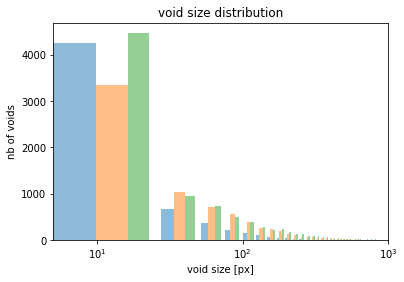

In [18]:
binwidth=50
data = [d["Vol (pix)"] for d in data_cav_analyse_filterd]

toto =plt.hist(data, bins=1000, alpha=0.5)
plt.xlim([5, 1000])
plt.xscale('symlog')
plt.xlabel("void size [px]")
plt.ylabel("nb of voids")
plt.title("void size distribution")
plt.show()

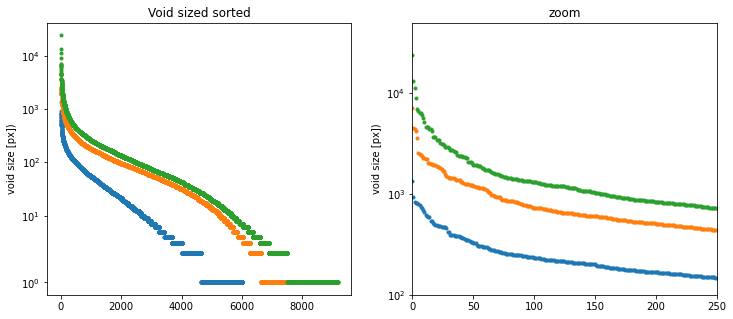

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

for d in data_cav_analyse_filterd:
    ax1.plot(sorted(d["Vol (pix)"], reverse=True), '.')
    
for d in data_cav_analyse_filterd:
    ax2.plot(sorted(d["Vol (pix)"], reverse=True), '.')
    
ax1.set_yscale('symlog')
ax1.set_title("Void sized sorted")
ax1.set_ylabel("void size [px])")

ax2.set_yscale('symlog')
ax2.set_title("zoom")
ax2.set_ylabel("void size [px])")
ax2.set_xlim([0, 250])
ax2.set_ylim([1e2, 5e4])

plt.show()

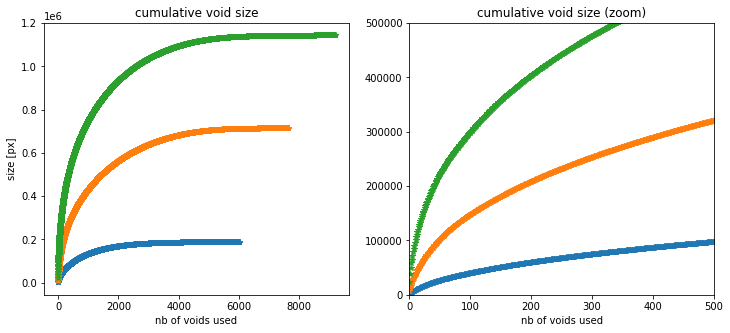

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

for d in data_cav_analyse_filterd:
    ax1.plot(np.cumsum(sorted(d["Vol (pix)"], reverse=True)), '*')
    
for d in data_cav_analyse_filterd:
    ax2.plot(np.cumsum(sorted(d["Vol (pix)"], reverse=True)), '*')
ax2.set_xlim([0, 500])
ax2.set_ylim([0, 5e5])
ax1.set_title("cumulative void size")
ax2.set_title("cumulative void size (zoom)")
ax1.set_xlabel("nb of voids used")
ax2.set_xlabel("nb of voids used")
ax1.set_ylabel("size [px]")
plt.show()

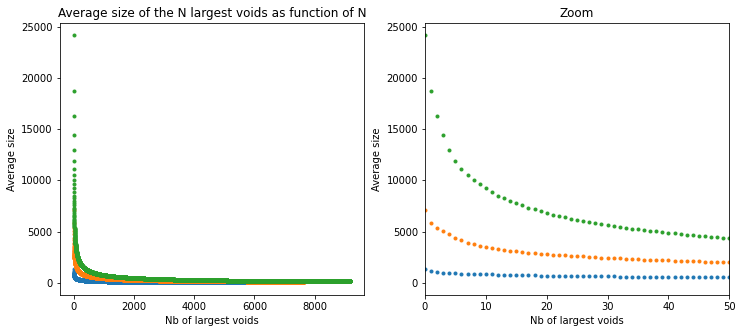

In [21]:
# we illustrate the evolution of the average size as function of the set of voids used

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

for d in data_cav_analyse_filterd:
    _tmp1 = np.cumsum(sorted(d["Vol (pix)"], reverse=True))
    _tmp2 = np.arange(len(_tmp1))+1
    ax1.plot(_tmp1/_tmp2, '.')
    
for d in data_cav_analyse_filterd:
    _tmp1 = np.cumsum(sorted(d["Vol (pix)"], reverse=True))
    _tmp2 = np.arange(len(_tmp1))+1
    ax2.plot(_tmp1/_tmp2, '.')

ax2.set_xlim([0, 50])

ax1.set_xlabel("Nb of largest voids")
ax2.set_xlabel("Nb of largest voids")
ax1.set_ylabel("Average size")
ax2.set_ylabel("Average size")
ax1.set_title("Average size of the N largest voids as function of N")

ax2.set_title("Zoom")
plt.show()